In [2]:
import re  # for regular expressions
import nltk # for text manipulation
import string 
import warnings
import numpy as np  # library for mathematical functions
import pandas as pd  # for formatting data, creating data frames deals with data
import seaborn as sns #library for making statistical graphics
import matplotlib.pyplot as plt # for platting graph and visualizing dats


In [3]:
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [4]:
%matplotlib inline


In [5]:
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [6]:
# label ‘1’ denotes the tweet is racist/sexist 
# label ‘0’ denotes the tweet is not racist/sexist
# print(train.head(10))
# print((train['label']==1).head(10))
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [7]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [8]:
print('dimension of train dataset')
print(train.shape)
print('dimension of test dataset')
print(test.shape)

dimension of train dataset
(31962, 3)
dimension of test dataset
(17197, 2)


In [9]:
train['label'].value_counts()
# returns a series cotaining count of unique values
# The returning abject will be in decending order

# counts=train['label'].value_counts()
# print(type(counts))
# <class 'pandas.core.series.Series'>

0    29720
1     2242
Name: label, dtype: int64

> Inference from value count is that 7% approx tweets are racist/sexist 93% approx. tweets are non racist/sexist

> str.len() is used to determine length of each string in a Pandas series

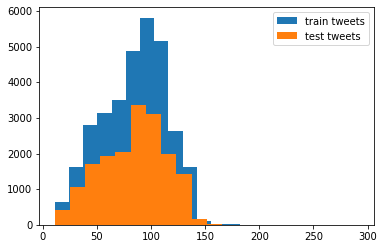

In [10]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train,bins=20,label='train tweets') # bin srefer to the interval
plt.hist(length_test,bins=20,label='test tweets')
plt.legend()
plt.show()

> This histogram means plotting two histogram on top of one another range is chossen as 20 which means 
    0-20,20-40,40-60,..........  and frequency is Number of time a value appears in a the specific range
    like around range 80-100 frequency is 6000 which is possible as tweet count is 27000 approx.

> legend() function is used to put labels like 'train tweets','test tweets'  in the visual representation and 
postion in the graph like left top,left bottom etc

In [11]:
# data cleaning
combi = train.append(test,ignore_index=True) # here true means resulting indexing is labelled as 0,1,2,3,4...n-1

combi.shape
# print(combi.head(10))
# print(combi.tail(10))

(49159, 3)

In [12]:
# steps below will help in removing unwanted text pattersn from 
# the tweet

def remove_pattern(input_txt,pattern):
    """
    remove a pattern present in the string 
    using regular expression matching and substutution
    """
    r=re.findall(pattern,input_txt)  
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

# re.findall(patter,string)
    # it finds or return the list of matching reglar expression
# re.sub(,replacement_string,string)

In [13]:
# this replaced @user in the tweets
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()
# vectorize function create a loop over a function to the end.
# as remove_pattern is passed 

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


def myfunc(a, b):

    "Return a-b if a>b, otherwise return a+b"

    if a > b:

        return a - b

    else:

        return a + b
        

vfunc = np.vectorize(myfunc)
vfunc([1, 2, 3, 4], 2)
array([3, 4, 1, 2])

In [14]:
# remove punctuation and number and special ,characters
# replace everything except characters and hashtags with spaces
# using str.replace function of pandas 
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head(10)

C:\Users\RAJKAM~1\AppData\Local\Temp/ipykernel_196/1274401551.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [15]:
# apply function in pandas help in apply a function over a column or whole data frame
# A lambda function is a small anonymous function.
# A lambda function can take any number of arguments, but can only have one expression.
# x = lambda a : a + 10
combi['tidy_tweet'] = combi['tidy_tweet'].apply (lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


> TEXT NORMALIZATION
here nltks`s PorterStemmer() function to normalize the tweets but before this we have to tokenize the tweets.

* Token are individuals terms or words and tokenization is the process of splitting a string of text into tokens.

In [16]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [17]:
print(tokenized_tweet.head(10))

0                                                      [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1                                          [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                                                  [#model, love, take, with, time]
4                                                                                                [factsguide, society, #motivation]
5                                   [huge, fare, talking, before, they, leave, chaos, disputes, when, they, there, #allshowandnogo]
6                                                                                                        [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about, that, #school, #exams, 

In [18]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x : [stemmer.stem(i) for i in x])


In [19]:
tokenized_tweet.head(2)

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
Name: tidy_tweet, dtype: object

In [20]:
len(tokenized_tweet)

49159

In [21]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet
#tokenized_tweet.head(2)
#combi['tidy_tweet'].head(2)


In [22]:
combi['tidy_tweet'].head()

0                  when father dysfunct selfish drag kid into dysfunct #run
1    thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                       bihday your majesti
3                                                #model love take with time
4                                                  factsguid societi #motiv
Name: tidy_tweet, dtype: object

In [23]:
combi.head(2)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank


In [24]:
all_words=' '.join([text for text in combi['tidy_tweet']])


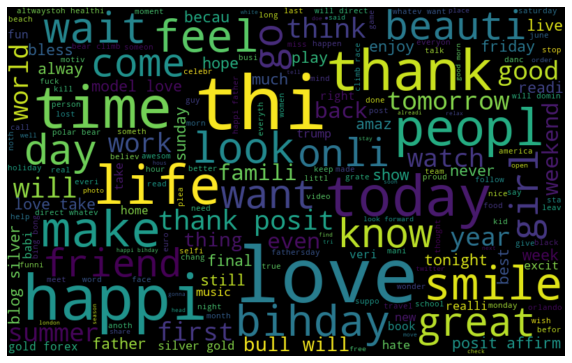

In [25]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

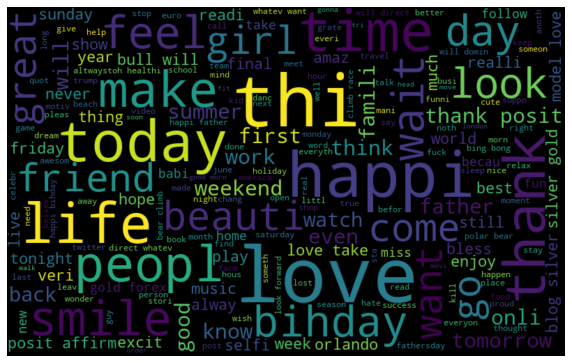

In [26]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

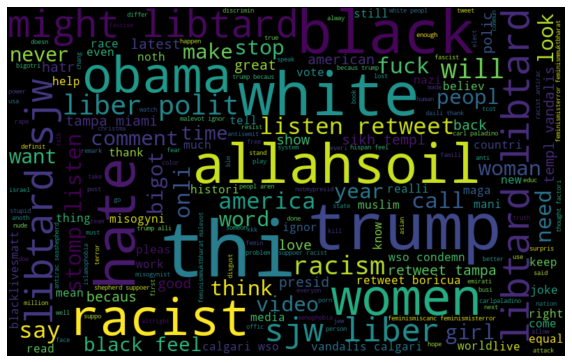

In [27]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
# function to collect hashtags 
def hashtag_extract(x):    
	hashtags = []    # Loop over the words in the tweet    
	for i in x:        
		ht = re.findall(r"#(\w+)", i)        		
		hashtags.append(ht)     
	return hashtags  

# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])  
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])


In [29]:

# unnesting the list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])


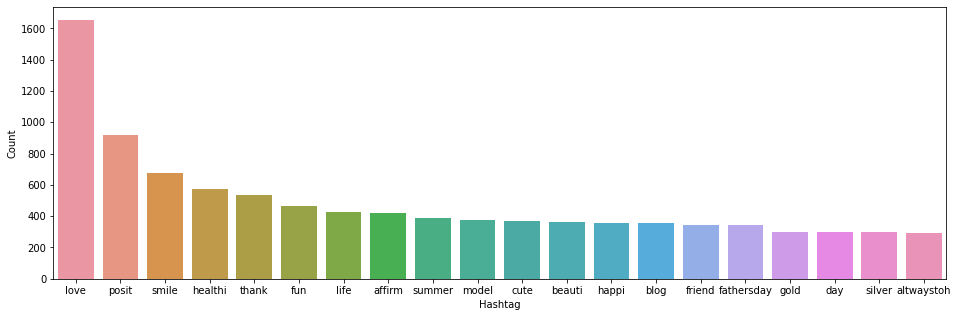

In [30]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

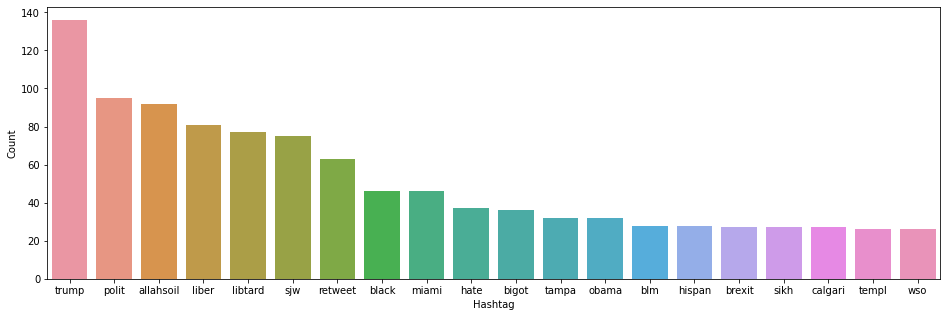

In [31]:
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()),'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags     
e = e.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
import gensim

In [33]:
# Bag of Word feature
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [35]:
tokenized_tweet.head(5)

0                  when father dysfunct selfish drag kid into dysfunct #run
1    thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                       bihday your majesti
3                                                #model love take with time
4                                                  factsguid societi #motiv
Name: tidy_tweet, dtype: object

In [36]:
# Pandas.apply allow the users to pass 
# a function and apply it on every single value of the Pandas series.


In [37]:
tokenized_tweet =combi['tidy_tweet'].apply(lambda x : x.split())
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [38]:
model_w2v = gensim.models.Word2Vec(tokenized_tweet,
    vector_size=200,    #desired no of features/independent variables
    window=5,     #context window size 
    min_count=2,
    sg=1,         #1 for skip-gram model
    hs=0,
    negative=10, #for negative sampling
    workers=2 , # no of cores
    seed=34) 

model_w2v.train(tokenized_tweet,total_examples=len(combi['tidy_tweet']),epochs=20)


(6510699, 7536020)

In [63]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.546894371509552),
 ('#avocado', 0.5424597263336182),
 ('dess', 0.5277460813522339),
 ('noodl', 0.5261526107788086),
 ('#cellar', 0.5231443643569946),
 ('#biall', 0.5230158567428589),
 ('spinach', 0.5203915238380432),
 ('cookout', 0.5149358510971069),
 ('#dnd', 0.5145605206489563),
 ('melani', 0.5140722393989563)]

In [64]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5392091274261475),
 ('#delegaterevolt', 0.5323552489280701),
 ('potu', 0.5307209491729736),
 ('phoni', 0.5258184671401978),
 ('nomine', 0.5164552927017212),
 ('tomlin', 0.5129597187042236),
 ('hillari', 0.5065698623657227),
 ('jibe', 0.5046077966690063),
 ('melo', 0.5020683407783508),
 ('presumpt', 0.499976247549057)]

In [66]:
print(f'What the model looks like {model_w2v}')

What the model looks like Word2Vec(vocab=17602, vector_size=200, alpha=0.025)


In [70]:
model_w2v.wv['food']

array([ 0.18502723, -0.39857203, -0.00875777, -0.15158147,  0.02532732,
        0.09613988,  0.03234021, -0.8077621 , -0.4463415 , -1.0592492 ,
       -0.15573415, -0.07142217, -0.37068847,  0.10746776, -0.4192292 ,
        0.17210872,  0.19885948,  0.1573548 , -0.21619786, -0.02895012,
       -0.6676122 ,  1.1041257 ,  0.15925635,  0.89521277, -0.35583356,
       -0.4684673 , -0.6195645 , -0.40301758,  0.1621031 ,  0.39602306,
        0.2282598 , -0.67981553,  0.06321107,  0.11353894, -0.04176102,
       -0.09497838,  0.4111188 , -0.05877798,  0.611672  , -0.51509035,
       -0.478778  ,  0.35066503, -0.57057756,  0.97999203, -0.06627142,
        0.0239246 ,  0.20408621,  0.59181935, -1.05849   ,  0.00677748,
       -0.08917829, -0.5548041 ,  0.38030377,  0.43708643,  0.817993  ,
       -0.2529761 ,  0.22452468,  0.22064121,  0.11984954,  0.00447836,
        0.3564001 , -0.35909873, -0.07635605, -0.1908569 , -0.24387683,
       -0.5073805 , -0.02666359, -0.06018921,  0.49235895,  0.09

In [71]:
len(model_w2v.wv['food'])

200

In [76]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count # find mean increamentally
    return vec

In [78]:
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [79]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)

In [81]:
from tqdm import tqdm
#tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [82]:
def add_label(twt):
    output=[]
    for i,s in zip(twt.index,twt):
        output.append(TaggedDocument(s,["tweet_"+str(i)]))
    return output

In [83]:
labeled_tweets = add_label(tokenized_tweet)
# label all the tweets

In [84]:
labeled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [86]:
model_d2v = gensim.models.Doc2Vec(
    dm=1, #dm=1 for distributed memory
    dm_mean=1, #dm=1 for using mean of the context word vector
    vector_size=200, #noof the desired feature
    window=5, #width of the context vector
    negative=7, #if > 0 then negative sampling will be used
    min_count=5, #ignores all words with total freuency lower than 2 
    workers=3, #no of cores
    alpha=0.1, #learning rate
    seed=23
)

In [87]:
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|██████████| 49159/49159 [00:00<00:00, 1002605.33it/s]


In [88]:
model_d2v.train(labeled_tweets,total_examples=len(combi['tidy_tweet']),epochs=15)

In [89]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)